In [139]:
#Libraries

import copy 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.cluster import KMeans

In [66]:
# Read Dataset
dataset = pd.read_csv('wine.csv',delimiter=',',header=0)
dataset


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
print(dataset.describe()) #Descripción de los datos


             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

In [69]:
correlation=dataset.corr() #Correlation Matrix
correlation

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


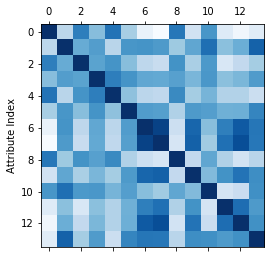

In [70]:
# Display the correlation matrix with a specified figure number and a bluescale
# colormap
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.show()

## Mutual Information

In [72]:
X = copy.deepcopy(dataset)
X.drop('Wine', axis=1, inplace=True)
y = copy.deepcopy(dataset['Wine'])

results_array = []

for NCLUSTER in range(2, 10):
    results = []
    for feature in X:
        temp = np.asarray(X[feature]).reshape(-1, 1)

        X_std = StandardScaler().fit_transform(temp)

        # Run local implementation of kmeans
        km = KMeans(n_clusters=NCLUSTER, max_iter=100)
        km.fit(X_std)

        results.append(mutual_info_score(km.labels_, y))
    results_array.append(results)

In [86]:
headers = []

for header in dataset:
    headers.append(header)

headers.pop(0)

df_MI = pd.DataFrame(results_array, columns=headers)
df_MI = df_MI.set_index(pd.Series(range(2, 10)))
df_MI.round(2)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
2,0.31,0.13,0.04,0.14,0.05,0.32,0.41,0.14,0.12,0.19,0.25,0.41,0.36
3,0.38,0.20,0.11,0.20,0.10,0.34,0.57,0.15,0.18,0.43,0.35,0.43,0.47
4,0.41,0.19,0.12,0.18,0.16,0.37,0.57,0.17,0.22,0.44,0.39,0.47,0.46
5,0.41,0.31,0.12,0.21,0.18,0.37,0.60,0.18,0.23,0.55,0.43,0.49,0.54
6,0.44,0.29,0.11,0.22,0.18,0.39,0.63,0.17,0.20,0.52,0.45,0.50,0.54
7,0.45,0.31,0.12,0.25,0.18,0.40,0.67,0.17,0.23,0.50,0.46,0.51,0.55
8,0.46,0.32,0.13,0.25,0.20,0.40,0.69,0.18,0.24,0.51,0.46,0.52,0.54
9,0.46,0.34,0.14,0.21,0.21,0.41,0.70,0.19,0.25,0.52,0.45,0.51,0.55


In [95]:
df_MI.describe().round(2)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,0.41,0.26,0.11,0.21,0.16,0.37,0.60,0.17,0.21,0.46,0.41,0.48,0.50
std,0.05,0.08,0.03,0.04,0.05,0.03,0.09,0.02,0.04,0.11,0.07,0.04,0.07
min,0.31,0.13,0.04,0.14,0.05,0.32,0.41,0.14,0.12,0.19,0.25,0.41,0.36
25%,0.40,0.20,0.11,0.20,0.15,0.36,0.57,0.16,0.20,0.44,0.38,0.46,0.46
50%,0.43,0.30,0.12,0.21,0.18,0.38,0.61,0.17,0.22,0.50,0.44,0.50,0.54
75%,0.45,0.32,0.13,0.23,0.19,0.40,0.67,0.18,0.23,0.52,0.45,0.51,0.54
max,0.46,0.34,0.14,0.25,0.21,0.41,0.70,0.19,0.25,0.55,0.46,0.52,0.55


In [102]:
MI_ranks = df_MI.describe().round(2) .values[1] #df.loc[df.n == "d", ['a','b']].values.flatten().tolist()
print(MI_ranks)

[0.41 0.26 0.11 0.21 0.16 0.37 0.6  0.17 0.21 0.46 0.41 0.48 0.5 ]


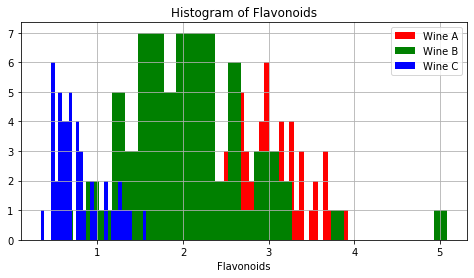

In [88]:
### Histogram of Flavanoids variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].Flavanoids, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].Flavanoids, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].Flavanoids, 30, facecolor='b')
plt.title('Histogram of Flavonoids')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Flavonoids")
plt.grid(True)
plt.show()


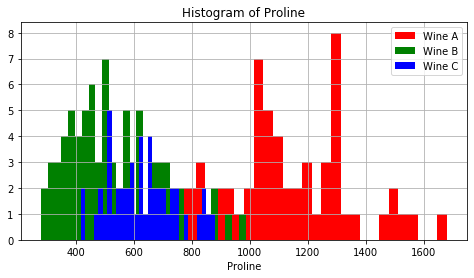

In [90]:
### Histogram of Proline variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].Proline, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].Proline, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].Proline, 30, facecolor='b')
plt.title('Histogram of Proline')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("Proline")
plt.grid(True)
plt.show()


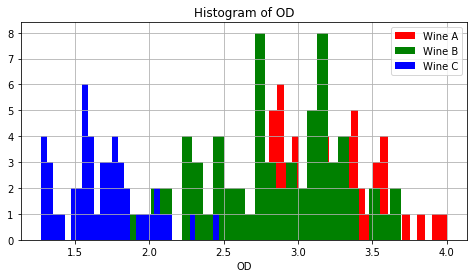

In [91]:
### Histogram of OD variable

plt.figure(figsize=(8,4))
plt.hist(dataset[dataset.Wine==1].OD, 30, facecolor='r')
plt.hist(dataset[dataset.Wine==2].OD, 30, facecolor='g')
plt.hist(dataset[dataset.Wine==3].OD, 30, facecolor='b')
plt.title('Histogram of OD')
plt.legend(['Wine A','Wine B','Wine C'])
plt.xlabel("OD")
plt.grid(True)
plt.show()


## PCA

In [47]:
flag = 'norm'

x = copy.deepcopy(dataset)
x.drop('Wine', axis=1, inplace=True)

x_std = StandardScaler().fit_transform(x)
x_std

if (flag != 'norm'):
    x_std = x

In [11]:
cor_mat = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.4229

4.705850252990428
2.4969737334111586
1.446071969712499
0.9189739237528245
0.8532281783543192
0.6416570314989338
0.5510283119410326
0.34849736328925224
0.288879942622662
0.25090248221273054
0.22578863969868931
0.1687702348285474
0.10337793568692853


<BarContainer object of 13 artists>

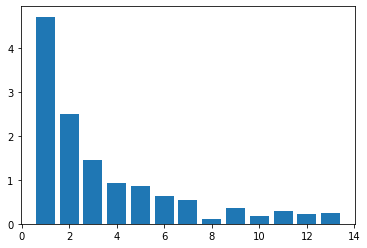

In [12]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(reverse=True)

# each eig_value will represent a portion of the data

for i in eig_pairs:
    print(i[0])

eig_x = np.linspace(1, len(eig_vals), len(eig_vals))
    
plt.bar(eig_x, eig_vals)

In [13]:
tot = sum(eig_vals)
# by calculating the percentage that each eig_value represents from the total, we can tell how much of the variance
# will be represented by each component
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

pc_n = 0

for i in cum_var_exp:
    pc_n = pc_n + 1
    if i > 90:
        print("We need", pc_n, "components to express 90% of the data.")
        break

We need 8 components to express 90% of the data.


In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_vals),1), 
                      eig_pairs[1][1].reshape(len(eig_vals),1)))

matrix_w

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

In [15]:
y = np.asarray(x_std.dot(matrix_w))
y

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

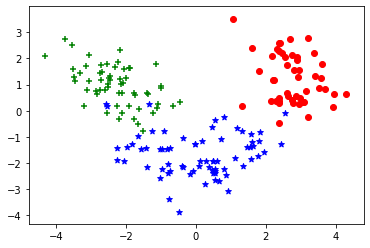

In [16]:
for i in range(0, len(dataset.Wine)):
    class_ = dataset.Wine[i]
    if class_ == 1:
        c1 = plt.scatter(y[i][0], y[i][1], c='g', marker='+')
    elif class_ == 2:
        c2 = plt.scatter(y[i][0], y[i][1], c='b', marker='*')
    else:
        c3 = plt.scatter(y[i][0], y[i][1], c='r', marker='o')

plt.show()

## LDA

In [27]:
flag = 'nonorm'

X = copy.deepcopy(dataset)
X.drop('Wine', axis=1, inplace=True)

x_std = StandardScaler().fit_transform(X)
x_std = pd.DataFrame(x_std, index=X.index, columns=X.columns)

if (flag != 'norm'):
    x_std = X

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x_std, dataset.Wine)

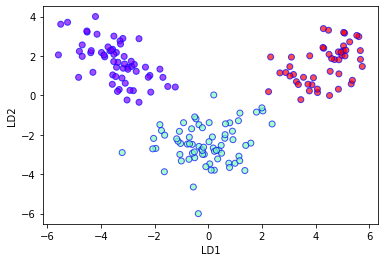

In [29]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0], X_lda[:,1], c=dataset.Wine, cmap='rainbow', alpha=0.7, edgecolors='b')

## Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df_1vs2 = pd.concat([dataset[dataset.Wine == 1], dataset[dataset.Wine == 2]])
y_1vs2 = df_1vs2.Wine
df_1vs2.drop('Wine', axis=1, inplace=True)

df_1vs3 = pd.concat([dataset[dataset.Wine == 1], dataset[dataset.Wine == 3]])
y_1vs3 = df_1vs3.Wine
df_1vs3.drop('Wine', axis=1, inplace=True)

df_2vs3 = pd.concat([dataset[dataset.Wine == 2], dataset[dataset.Wine == 3]])
y_2vs3 = df_2vs3.Wine
df_2vs3.drop('Wine', axis=1, inplace=True)

dfs = [df_1vs2, df_1vs3, df_2vs3]
ys = [y_1vs2, y_1vs3, y_2vs3]

logreg = LogisticRegression(solver='lbfgs')

## Full

In [148]:
for df, y in zip(dfs, ys):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = float(cm[0][0])/np.sum(cm[0])
    tn = float(cm[1][1])/np.sum(cm[1])
    print(precision_score(y_test, y_pred, average='micro').round(2), tp.round(2), tn.round(2), roc_auc_score(y_test, y_pred, average='micro').round(2))
    

0.97 0.95 1.0 0.97
1.0 1.0 1.0 1.0
0.94 0.91 1.0 0.96


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### PCA

In [151]:
from sklearn.decomposition import PCA

scaler = StandardScaler()

for df, y in zip(dfs, ys):
    print('-'*117)
    for NCOMP in range(1, 14):
        X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

        # Fit on training set only.
        scaler.fit(X_train)
        # Apply transform to both the training set and the test set.
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        pca = PCA(n_components=NCOMP)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        tp = float(cm[0][0])/np.sum(cm[0])
        tn = float(cm[1][1])/np.sum(cm[1])
        print(precision_score(y_test, y_pred, average='micro').round(2), tp.round(2), tn.round(2), roc_auc_score(y_test, y_pred, average='micro').round(2))
    

---------------------------------------------------------------------------------------------------------------------
0.9 1.0 0.8 0.9
0.9 1.0 0.8 0.9
0.9 1.0 0.8 0.9
0.97 1.0 0.95 0.98
0.97 1.0 0.95 0.98
0.95 1.0 0.9 0.95
0.95 1.0 0.9 0.95
0.95 1.0 0.9 0.95
0.97 1.0 0.95 0.98
0.97 1.0 0.95 0.98
0.97 1.0 0.95 0.98
1.0 1.0 1.0 1.0
0.95 1.0 0.9 0.95
---------------------------------------------------------------------------------------------------------------------
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
---------------------------------------------------------------------------------------------------------------------
0.97 0.96 1.0 0.98
0.97 0.96 1.0 0.98
0.97 0.96 1.0 0.98
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.96
0.94 0.91 1.0 0.9

## Mutual Information

In [106]:
headers_sorted = [x for _,x in sorted(zip(MI_ranks, headers))][::-1]
headers_sorted

['Flavanoids',
 'Proline',
 'OD',
 'Color.int',
 'Hue',
 'Alcohol',
 'Phenols',
 'Malic.acid',
 'Proanth',
 'Acl',
 'Nonflavanoid.phenols',
 'Mg',
 'Ash']

In [153]:
scaler = StandardScaler()

for df, y in zip(dfs, ys):
    i = 1
    df_split = pd.DataFrame()
    print('-'*117)
    for feature in headers_sorted:
        df_split[feature] = df[feature]

        X_train, X_test, y_train, y_test = train_test_split(df_split, y, test_size=0.3, random_state=0)

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        tp = float(cm[0][0])/np.sum(cm[0])
        tn = float(cm[1][1])/np.sum(cm[1])
        print(precision_score(y_test, y_pred, average='micro').round(2), tp.round(2), tn.round(2), roc_auc_score(y_test, y_pred, average='micro').round(2))
        i += 1

---------------------------------------------------------------------------------------------------------------------
0.82 0.95 0.7 0.82
0.95 1.0 0.9 0.95
0.95 1.0 0.9 0.95
0.92 1.0 0.85 0.92
0.92 1.0 0.85 0.92
0.95 1.0 0.9 0.95
0.95 1.0 0.9 0.95
0.97 1.0 0.95 0.98
0.97 1.0 0.95 0.98
0.95 1.0 0.9 0.95
0.97 1.0 0.95 0.98
0.95 1.0 0.9 0.95
0.95 1.0 0.9 0.95
---------------------------------------------------------------------------------------------------------------------
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
---------------------------------------------------------------------------------------------------------------------
0.97 1.0 0.92 0.96
0.94 0.96 0.92 0.94
0.97 0.96 1.0 0.98
0.97 0.96 1.0 0.98
0.92 0.87 1.0 0.93
0.92 0.87 1.0 0.93
0.92 0.87 1.0 0.93
0.94 0.91 1.0 0.96
0.92 0.87 1.0 0.93
0.92 0.87 1.0 0.93
0.92 0.

### LDA

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for df, y in zip(dfs, ys):

    lda = LinearDiscriminantAnalysis()
    X_lda = lda.fit_transform(df, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=0)
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = float(cm[0][0])/np.sum(cm[0])
    tn = float(cm[1][1])/np.sum(cm[1])
    print(precision_score(y_test, y_pred, average='micro').round(2), tp.round(2), tn.round(2), roc_auc_score(y_test, y_pred, average='micro').round(2))
        

1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0
